In [2]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None




df = pd.read_csv('alfa.us.txt')

In [3]:
df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2012-06-05,23.9130,24.1010,23.9130,24.1010,1364,0
1,2012-06-06,24.5860,24.6060,24.4380,24.5560,1561,0
2,2012-06-07,25.3880,25.3880,24.7050,24.7250,3234,0
3,2012-06-08,24.6950,24.8430,24.6950,24.8040,808,0
4,2012-06-11,25.2890,25.2890,24.4670,24.4670,3921,0
...,...,...,...,...,...,...,...
1348,2017-11-06,42.5000,42.5690,42.5000,42.5389,1139,0
1349,2017-11-07,42.2400,42.2400,42.2400,42.2400,631,0
1350,2017-11-08,42.0892,42.2100,42.0892,42.2100,576,0
1351,2017-11-09,42.3500,42.3500,41.6320,41.9000,1144,0


In [4]:
df['TP'] = (df['Open'] + df['High'] + df['Close']) / 3
df

,Date,Open,High,Low,Close,Volume,OpenInt,TP
0,2012-06-05,23.9130,24.1010,23.9130,24.1010,1364,0,24.038333
1,2012-06-06,24.5860,24.6060,24.4380,24.5560,1561,0,24.582667
2,2012-06-07,25.3880,25.3880,24.7050,24.7250,3234,0,25.167000
3,2012-06-08,24.6950,24.8430,24.6950,24.8040,808,0,24.780667
4,2012-06-11,25.2890,25.2890,24.4670,24.4670,3921,0,25.015000
...,...,...,...,...,...,...,...,...
1348,2017-11-06,42.5000,42.5690,42.5000,42.5389,1139,0,42.535967
1349,2017-11-07,42.2400,42.2400,42.2400,42.2400,631,0,42.240000
1350,2017-11-08,42.0892,42.2100,42.0892,42.2100,576,0,42.169733
1351,2017-11-09,42.3500,42.3500,41.6320,41.9000,1144,0,42.200000


In [5]:
N = 20
K = 3
df['UpperBand'] = df['Close'].rolling(N).mean() + K*df['Close'].rolling(N).std()
df['LowerBand'] = df['Close'].rolling(N).mean() - K*df['Close'].rolling(N).std()
df

,Date,Open,High,Low,Close,Volume,OpenInt,TP,UpperBand,LowerBand
0,2012-06-05,23.9130,24.1010,23.9130,24.1010,1364,0,24.038333,NaN,NaN
1,2012-06-06,24.5860,24.6060,24.4380,24.5560,1561,0,24.582667,NaN,NaN
2,2012-06-07,25.3880,25.3880,24.7050,24.7250,3234,0,25.167000,NaN,NaN
3,2012-06-08,24.6950,24.8430,24.6950,24.8040,808,0,24.780667,NaN,NaN
4,2012-06-11,25.2890,25.2890,24.4670,24.4670,3921,0,25.015000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1348,2017-11-06,42.5000,42.5690,42.5000,42.5389,1139,0,42.535967,42.882717,41.215113
1349,2017-11-07,42.2400,42.2400,42.2400,42.2400,631,0,42.240000,42.889105,41.213125
1350,2017-11-08,42.0892,42.2100,42.0892,42.2100,576,0,42.169733,42.884639,41.214591
1351,2017-11-09,42.3500,42.3500,41.6320,41.9000,1144,0,42.200000,42.857460,41.205170


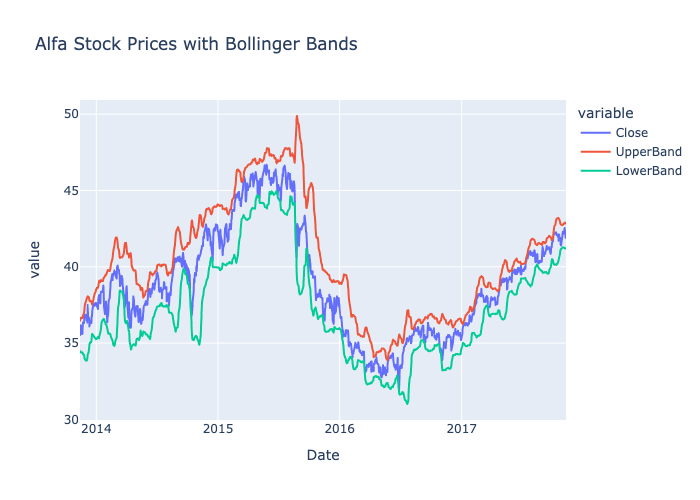

In [6]:
import plotly.express as px

fig = px.line(df[-1000:], x="Date", y=['Close', 'UpperBand', 'LowerBand'],
              title='Alfa Stock Prices with Bollinger Bands')

#fig.show() #to allow scaling
fig.show('png')

In [7]:
import numpy as np

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = df.dropna()
X = np.array(df[['UpperBand', 'LowerBand']])[:-5]
y = np.array(df['Close'].shift(-5))[:-5]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, shuffle=False)
reglin = LinearRegression().fit(X_train, y_train)

y_pred = reglin.predict(X_test)

from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MAE is 0.558670034227298
MSE is 0.44682882476746605
R2 score is 0.9184879770460384


In [9]:
dtest = df[-len(y_test):]
dtest['PredClose'] = y_pred

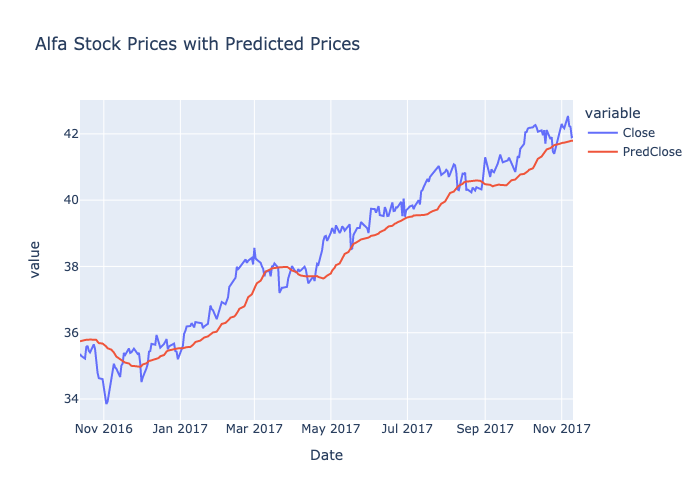

In [10]:
import plotly.express as px

fig = px.line(dtest, x="Date", y=['Close', 'PredClose'],
              title='Alfa Stock Prices with Predicted Prices')

#fig.show() #to allow scaling
fig.show('png')